In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [2]:
dat = pd.read_csv('get_nicu_admission_05_16.csv')

In [3]:
# assemble bmi, if not measured then calculate from height/weight
dat['bmi'] = np.where(dat.earliest_bmi.isna(), dat.computed_bmi, dat.earliest_bmi)
print(len(dat))
#dat.head()

11404


In [4]:
# select only nicu and bmi is not null
dat_selected = dat[(dat.nicu_admission.isna()==False) & (dat.bmi.isna()==False)].copy()
dat_selected['year'] = pd.to_datetime(dat.preg_end_date).dt.year
len(dat_selected)

6904

In [5]:
# double check
dat_selected.bmi.isna().mean(), dat_selected.nicu_admission.isna().mean()

(0.0, 0.0)

In [6]:
def bmi_group(x):
    '''
      convert bmi to groups
    '''
    if x < 18.5:
        return 'underweight'
    elif x < 25:
        return 'healthy'
    elif x < 30:
        return 'overweight'
    elif x < 35:
        return 'obese_1'
    elif x < 40:
        return 'obese_2'
    else:
        return 'obese_3'

In [7]:
dat_selected['bmi_group'] = dat_selected['bmi'].apply(bmi_group)
#dat_selected

In [8]:
# get the values
group_ref = dat_selected[dat_selected.bmi_group=='healthy'].nicu_admission.values
for bmi_group in ['underweight','healthy','overweight','obese_1','obese_2','obese_3']:
    group_compare = dat_selected[dat_selected.bmi_group==bmi_group].nicu_admission.values
    p_val = ttest_ind(group_ref, group_compare).pvalue
    print(f"{bmi_group} count={len(group_compare)} nicu_count={group_compare.sum()} ratio={group_compare.mean()} p={p_val}")

underweight count=175 nicu_count=15.0 ratio=0.08571428571428572 p=0.8108418401119706
healthy count=2118 nicu_count=193.0 ratio=0.091123701605288 p=1.0
overweight count=1834 nicu_count=154.0 ratio=0.08396946564885496 p=0.42817812118836085
obese_1 count=1308 nicu_count=140.0 ratio=0.10703363914373089 p=0.1267668488551592
obese_2 count=790 nicu_count=94.0 ratio=0.1189873417721519 p=0.025027363243245296
obese_3 count=679 nicu_count=98.0 ratio=0.14432989690721648 p=7.642923160418171e-05


In [10]:
dat_selected['obesity'] = np.where(dat_selected.bmi >= 30, 'yes', 'no')
#dat_selected.head()

In [11]:
# plot as a function of year
# there're only 2 records for 2018, so remove them
tmp = dat_selected[dat_selected.year>2018].groupby(['year','obesity'])['nicu_admission'].value_counts(normalize=True).rename('percentage').reset_index()
tmp

,year,obesity,nicu_admission,percentage
0,2019,no,0.0,0.868607
1,2019,no,1.0,0.131393
2,2019,yes,0.0,0.837241
3,2019,yes,1.0,0.162759
4,2020,no,0.0,0.932673
5,2020,no,1.0,0.067327
6,2020,yes,0.0,0.898821
7,2020,yes,1.0,0.101179
8,2021,no,0.0,0.924848
9,2021,no,1.0,0.075152


Text(40.122291666666655, 0.5, 'NICU admission rate')

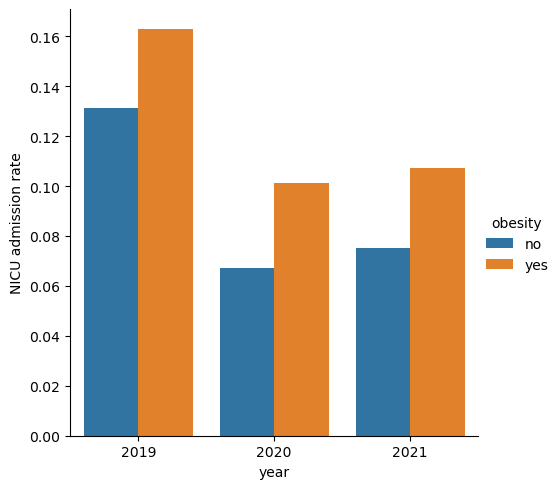

In [12]:
sns.catplot(tmp[tmp.nicu_admission==1], x='year', y='percentage', hue='obesity', kind='bar')
plt.ylabel('NICU admission rate')

In [13]:
# get BMI < 30 and >= 30 to compare with paper
group1 = dat_selected[dat_selected.bmi >= 30].nicu_admission
group2 = dat_selected[dat_selected.bmi < 30].nicu_admission
print(ttest_ind(group_ref, group_compare).pvalue)
(dat_selected[dat_selected.bmi < 30].nicu_admission.value_counts(),
dat_selected[dat_selected.bmi >= 30].nicu_admission.value_counts())

7.642923160418171e-05


(nicu_admission
 0.0    3765
 1.0     362
 Name: count, dtype: int64,
 nicu_admission
 0.0    2445
 1.0     332
 Name: count, dtype: int64)